<a href="https://colab.research.google.com/github/nguyen-nhat-mai/train_agent_play_flappy-bird/blob/main/Train_agent_play_text_flappybird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RL Individual Assignment: Text Flappy Bird**
By Nhat Mai NGUYEN

## **Setup**

In [1]:
pip install git+https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to /tmp/pip-req-build-saxv4apg
  Running command git clone --filter=blob:none --quiet https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git /tmp/pip-req-build-saxv4apg
  Resolved https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to commit bdbddee93a6d59029989c32cc41748adb2724f51
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 13.4 MB/s eta 0:00:00
  Created wheel for text-flappy-bird-gym: filename=text_flappy_bird_gym-0.1.0-py3-none-any.whl size=7806 sha256=251cdc2ccf5309257463c0aa3c28f9599c9761cc93c746c1ac49dfce1044aec1
  Stored in directory: /tmp/pip-ephem-wheel-cache-_e5sbp

In [2]:
import os, sys
import gymnasium as gym
import time
import text_flappy_bird_gym
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import pandas as pd

## **Environment TextFlappyBird-v0**

Some notes on the environment:
*   dx: horizontal distance to the pipeline
*   dy: vertical distance to the pipeline gap center
*   every step taken, if the bird is alive, the reward = 1

In [3]:
# initiate environment
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
state = env.reset()

# iterate
while True:

    # Select next action
    action = env.action_space.sample()

    # Appy action and return new state of the environment
    state, reward, done, _, info = env.step(action)
    

    # Render the game
    os.system("clear")
    sys.stdout.write(env.render())
    time.sleep(0.2) # FPS

    # If player is dead break
    if done:
        break
    print("Reward",reward)
    print("-----------------")

env.close()

Text Flappy Bird!
Score: 0
----------------------
[                  | ]
[                    ]
[                    ]
[                    ]
[                    ]
[                  | ]
[                  | ]
[      @           | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=12,dy=4)
Reward 1
-----------------
Text Flappy Bird!
Score: 0
----------------------
[                 |  ]
[                    ]
[                    ]
[                    ]
[                    ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[      @          |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=11,dy=6)
Reward 1
-----------------
Text

In [4]:
# Extract action list
action_space = env.action_space
if isinstance(action_space, gym.spaces.Discrete):
     num_actions = action_space.n
     action_list = list(range(num_actions))
print(action_list, "= ['Idle','Flap']")

[0, 1] = ['Idle','Flap']


In [5]:
# Set hyperparameters
alpha = 0.7  # learning rate
gamma = 1  # discount factor
epsilon = 0.2  # exploration rate
num_episodes = 1000  # number of training episodes

## **Q-learning**

In [6]:
# Get Q-value for a state-action pair
def get_q_value(state, action, q_table):
    if state not in q_table:
        q_table[state] = {}
    if action not in q_table[state]:
        q_table[state][action] = 0.0
    return q_table[state][action]

# Update Q-value for a state-action pair
def update_q_value(state, action, reward, next_state, q_table):
    current_q = get_q_value(state, action,q_table)
    max_next_q = max([get_q_value(next_state, next_action,q_table) for next_action in action_list])
    new_q = (1 - alpha)*current_q + alpha * (reward + gamma * max_next_q) # bellman equation
    q_table[state][action] = new_q

In [7]:
# Choose action using epsilon-greedy policy
def choose_action(state,q_table):
    if random.random() < epsilon:
        return random.choice(action_list)
    else:
        q_values = [get_q_value(state, action,q_table) for action in action_list]
        max_q = max(q_values)
        if q_values.count(max_q) > 1:
            best_actions = [i for i in action_list if q_values[i] == max_q]
            return random.choice(best_actions) # randomly choose best action that has the same max Q
        else:
            return q_values.index(max_q) # choose the action that has max Q

In [8]:
# Run Q-learning agent
def train_q_learning(alpha,gamma,epsilon,num_episodes):
  reward_q_learning = []
  q_table_qlearning = {}

  for episode in range(num_episodes):
      state = env.reset()[0]
      total_reward = 0
      while True:
          # take action depends on state
          action = choose_action(state,q_table_qlearning)
          next_state, reward, done, _, info = env.step(action)
          # penalty when die
          if done == True:
              reward = -10
          # update episode reward & q-table
          total_reward += reward
          update_q_value(state, action, reward, next_state,q_table_qlearning)
          state = next_state
          # exit episode when die
          if done:
              break
      env.close()
      reward_q_learning.append(total_reward)

  return reward_q_learning, q_table_qlearning

reward_q_learning, q_table_qlearning = train_q_learning (alpha,gamma,epsilon,num_episodes)

## **SARSA**

In [9]:
# Update Q-value using the SARSA update rule
def update_q_value_sarsa(state, action, reward, next_state, next_action,q_table):
    current_q = get_q_value(state, action,q_table)
    next_q = get_q_value(next_state, next_action,q_table)
    new_q = (1 - alpha)*current_q + alpha * (reward + gamma * next_q)
    q_table[state][action] = new_q

In [10]:
def train_sarsa(alpha,gamma,epsilon,num_episodes):
  reward_sarsa = []
  q_table_sarsa = {}

  # Run SARSA agent
  for i_episode in range(num_episodes):
      state = env.reset()[0]
      total_reward = 0
      while True:
          # take action depends on state
          action = choose_action(state,q_table_sarsa)
          next_state, reward, done, _, info = env.step(action)
          # penalty when die
          if done == True:
              reward = -10
          # update episode reward & q-table
          total_reward += reward
          next_action = choose_action(next_state,q_table_sarsa)
          update_q_value_sarsa(state, action, reward, next_state, next_action,q_table_sarsa)
          state = next_state
          # exit episode when die
          if done:
              break
      env.close()
      reward_sarsa.append(total_reward)
  return reward_sarsa, q_table_sarsa

reward_sarsa, q_table_sarsa = train_sarsa(alpha,gamma,epsilon,num_episodes)

## **Random**

In [11]:
# Run random agent
reward_random = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    while True:
        # take random action
        action = env.action_space.sample()
        state, reward, done, _, info = env.step(action)
        # penalty when die
        if done == True:
            reward = -10
        # update episode reward
        total_reward += reward
        # exit episode when die
        if done:
          break
    env.close()
    reward_random.append(total_reward)

## **Insights**

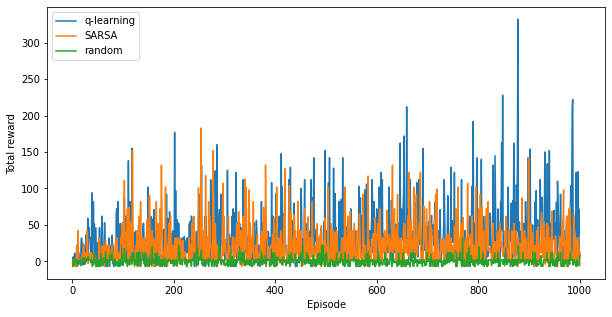

In [12]:
# Compare rewards among agents
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1,num_episodes+1), reward_q_learning, label="q-learning")
ax.plot(np.arange(1,num_episodes+1), reward_sarsa, label="SARSA")
ax.plot(np.arange(1,num_episodes+1), reward_random, label="random")
ax.set_xlabel('Episode')
ax.set_ylabel('Total reward')
ax.legend()
plt.show()

In [13]:
# Convert q-table into state-value dictionary
def state_function_df(input_dict):
    # Extract list of unique dx, dy (represent the state)
    dx_set = set()
    dy_set = set()
    for key in input_dict.keys():
        dx_set.add(key[0])
        dy_set.add(key[1])

    dx_list = sorted(list(dx_set))
    dy_set = sorted(list(dy_set))
    # Create df to store max_values by dx & dy
    df = pd.DataFrame(columns=dy_set, index=dx_list)

    for key in input_dict.keys():
        # get the maximum value in the inner dictionary
        max_value = max(input_dict[key].values())
        df.loc[key[0], key[1]] = max_value
   
    return df.astype(float)

state_value_qlearn = state_function_df(q_table_qlearning)
state_value_sarsa = state_function_df(q_table_sarsa)

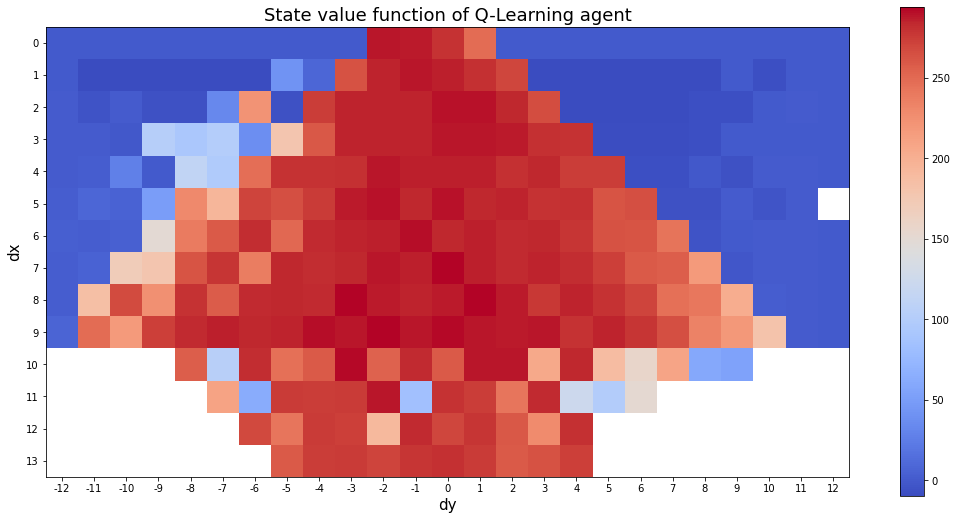

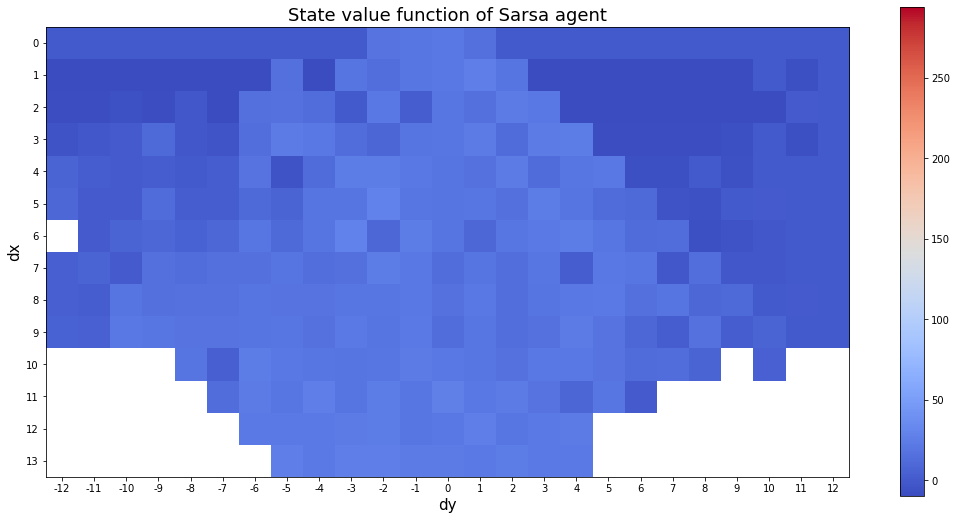

In [14]:
# Plot state value function
def plot_state_value_function(df,agent_name,min_scale,max_scale):

  fig, ax = plt.subplots(figsize=(18,9))
  plt.imshow(df, cmap='coolwarm',vmin=min_scale, vmax=max_scale)
  plt.colorbar()
  plt.title(f"State value function of {agent_name} agent",fontsize = 18)
  plt.xlabel("dy",fontsize = 15)
  plt.ylabel("dx",fontsize = 15)
  plt.xticks(range(len(df.columns)), df.columns)
  plt.yticks(range(len(df)), df.index)
  plt.show()

# Make sure both use the same value scale to plot heatmap
min_scale = min(state_value_qlearn.min().min(),state_value_sarsa.min().min())
max_scale = max(state_value_qlearn.max().max(),state_value_sarsa.max().max())
plot_state_value_function(state_value_qlearn,"Q-Learning",min_scale,max_scale)
plot_state_value_function(state_value_sarsa,"Sarsa",min_scale,max_scale)

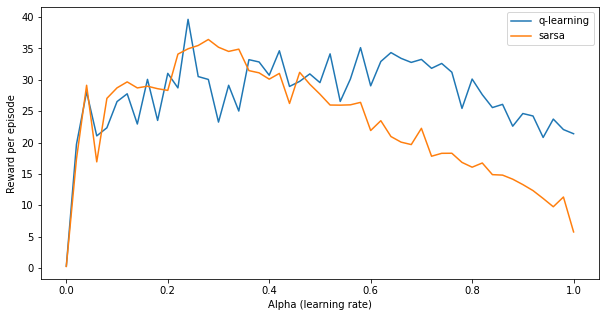

In [15]:
# Agent performance sensitivity against alpha
alpha_range = np.arange(0, 1.02, 0.02)
reward_per_episode_qlearn = []
reward_per_episode_sarsa = []

for alpha in alpha_range:
  # Calculate reward for q-learning
  reward_q_learning, q_table_qlearning = train_q_learning(alpha,gamma,epsilon,num_episodes)
  reward_per_episode = np.average(reward_q_learning)
  reward_per_episode_qlearn.append(reward_per_episode)
  # Calculate reward for sarsa
  reward_sarsa, q_table_sarsa = train_sarsa(alpha,gamma,epsilon,num_episodes)
  reward_per_episode = np.average(reward_sarsa)
  reward_per_episode_sarsa.append(reward_per_episode)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alpha_range, reward_per_episode_qlearn,label="q-learning")
ax.plot(alpha_range, reward_per_episode_sarsa,label="sarsa")
ax.set_xlabel('Alpha (learning rate)')
ax.set_ylabel('Reward per episode')
ax.legend()
plt.show()

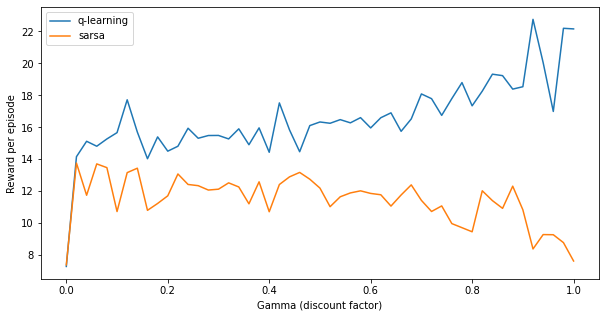

In [16]:
# Agent performance sensitivity against gamma
gamma_range = np.arange(0, 1.02, 0.02)
reward_per_episode_qlearn = []
reward_per_episode_sarsa = []

for gamma in gamma_range:
  # Calculate reward for q-learning
  reward_q_learning, q_table_qlearning = train_q_learning(alpha,gamma,epsilon,num_episodes)
  reward_per_episode = np.average(reward_q_learning)
  reward_per_episode_qlearn.append(reward_per_episode)
  # Calculate reward for sarsa
  reward_sarsa, q_table_sarsa = train_sarsa(alpha,gamma,epsilon,num_episodes)
  reward_per_episode = np.average(reward_sarsa)
  reward_per_episode_sarsa.append(reward_per_episode)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(gamma_range, reward_per_episode_qlearn,label="q-learning")
ax.plot(gamma_range, reward_per_episode_sarsa,label="sarsa")
ax.set_xlabel('Gamma (discount factor)')
ax.set_ylabel('Reward per episode')
ax.legend()
plt.show()

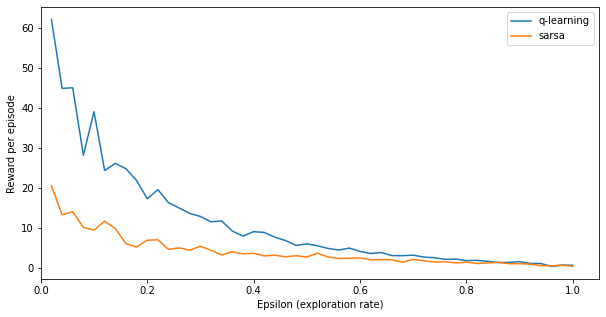

In [23]:
# Agent performance sensitivity against epsilon
epsilon_range = np.arange(0.02, 1.02, 0.02)
reward_per_episode_qlearn = []
reward_per_episode_sarsa = []

for epsilon in epsilon_range:
  # Calculate reward for q-learning
  reward_q_learning, q_table_qlearning = train_q_learning(alpha,gamma,epsilon,num_episodes)
  reward_per_episode = np.average(reward_q_learning)
  reward_per_episode_qlearn.append(reward_per_episode)
  # Calculate reward for sarsa
  reward_sarsa, q_table_sarsa = train_sarsa(alpha,gamma,epsilon,num_episodes)
  reward_per_episode = np.average(reward_sarsa)
  reward_per_episode_sarsa.append(reward_per_episode)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(epsilon_range, reward_per_episode_qlearn,label="q-learning")
ax.plot(epsilon_range, reward_per_episode_sarsa,label="sarsa")
ax.set_xlim(left=0)
ax.set_xlabel('Epsilon (exploration rate)')
ax.set_ylabel('Reward per episode')
ax.legend()
plt.show()

## **Environment TextFlappyBird-screen-v0**

Some notes on the environment:


*   the environment is displayed on matrix, 2 represent pipeline & 1 represent the bird
*   every step taken, if the bird is alive, the reward = 1



In [50]:
# initiate environment
env = gym.make('TextFlappyBird-screen-v0', height = 15, width = 20, pipe_gap = 4)
state = env.reset()

# iterate
while True:

    # Select next action
    action = env.action_space.sample()

    # Appy action and return new state of the environment
    state, reward, done, _, info = env.step(action)
    print("State:")
    print(state)

    # Render the game
    os.system("clear")
    sys.stdout.write(env.render())
    time.sleep(0.2) # FPS

    # If player is dead break
    if done:
        break
    print("Reward",reward)
    print("-----------------")

env.close()

State:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 0 0 0 0 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Text Flappy Bird!
Score: 0
----------------------
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[      @             ]
[                    ]
[                    ]
[                    ]
[                  | ]
[                  | ]
[     

## **Environment "FlappyBird-v0"**

Some notes on the environment:

*   state comprise 2 values (horizontal distance to the next pipe, difference between the player's y position and the next hole's y position)
*   every step taken, if the bird is alive, the reward = 1



In [25]:
!pip install flappy-bird-gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.1/558.1 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.6 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.18.3-py3-none-any.whl size=1657529 sha256=3da42252a764eddd556c024e97a80a482b21ca64a3d27abef0e12328ba9b36bb
  Stored in directory: /root/.cache/pip/wheels/b5/b2/22/18f5aaab5f166438bee1abb6194e5cc2602981620a7c15dbda
Successfully built gym
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.

In [26]:
import flappy_bird_gym

In [37]:
# initiate environment
env = flappy_bird_gym.make("FlappyBird-v0")
state = env.reset()

while True:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)
  print("Action",action)
  print("State:",state)
  print("Reward",reward)
  print("Info",info)
  print("-----------")
  if done:
    break

Action 1
State: [ 1.64236111 -0.08984375]
Reward 1
Info {'score': 0}
-----------
Action 0
State: [ 1.62847222 -0.07421875]
Reward 1
Info {'score': 0}
-----------
Action 1
State: [ 1.61458333 -0.05664062]
Reward 1
Info {'score': 0}
-----------
Action 1
State: [ 1.60069444 -0.0390625 ]
Reward 1
Info {'score': 0}
-----------
Action 0
State: [ 1.58680556 -0.0234375 ]
Reward 1
Info {'score': 0}
-----------
Action 1
State: [ 1.57291667 -0.00585938]
Reward 1
Info {'score': 0}
-----------
Action 0
State: [1.55902778 0.00976562]
Reward 1
Info {'score': 0}
-----------
Action 1
State: [1.54513889 0.02734375]
Reward 1
Info {'score': 0}
-----------
Action 1
State: [1.53125    0.04492188]
Reward 1
Info {'score': 0}
-----------
Action 1
State: [1.51736111 0.0625    ]
Reward 1
Info {'score': 0}
-----------
Action 0
State: [1.50347222 0.078125  ]
Reward 1
Info {'score': 0}
-----------
Action 1
State: [1.48958333 0.09570312]
Reward 1
Info {'score': 0}
-----------
Action 1
State: [1.47569444 0.11328125]
